## Introduction

This in-class example demonstrates how you approach a new data set and conduct simple data analysis.

What you need to know:  
- Statsmodels and pandas modules in Python
- Theoretical concepts on statistical moments
- Theoretical concepts on simple linear regression model

The list of [references](#References) for detailed concepts and techniques used in this exerise.
***

## Content
- [Load the required modules](#Load-the-required-modules)
- [Data check and summary statistics](#Data-check-and-summary-statistics)
- [Simple Linear Regression Model](#Simple-Linear-Regression-Model) 
- [References](#References)

***
## Data Description

The house price data with file name ```hprice1.csv``` contains the following variables

| Name | Description |
| :--- | :--- |
| price    | house price, \$1000s |
| assess   | assessed value, \$1000s |
| bdrms    | number of bdrms |
| lotsize  | size of lot in square feet |
| sqrft    | size of house in square feet |
| colonial | =1 if home is colonial style |
| lprice   | log(price) |
| lassess  | log(assess |
| llotsize | log(lotsize) |
| lsqrft   | log(sqrft) |


***
## Load the required modules

In [1]:
import math
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

***
## Data-check-and-summary-statistics

#### Load the data set
The data set is contained in a comma-separated value (csv) file named "*hprice1*" with column header. 

In [2]:
hp_data = pd.read_csv('hprice1.csv')

#### Check if the data is properly imported

In [3]:
hp_data.head(10)

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
0,300.000,349.1,4,6126,2438,1,5.703783,5.855359,8.720297,7.798934
1,370.000,351.5,3,9903,2076,1,5.913503,5.862210,9.200593,7.638198
2,191.000,217.7,3,5200,1374,0,5.252274,5.383118,8.556414,7.225482
3,195.000,231.8,3,4600,1448,1,5.273000,5.445875,8.433811,7.277938
4,373.000,319.1,4,6095,2514,1,5.921578,5.765504,8.715224,7.829630
5,466.275,414.5,5,8566,2754,1,6.144775,6.027073,9.055556,7.920810
6,332.500,367.8,3,9000,2067,1,5.806640,5.907539,9.104980,7.633853
7,315.000,300.2,3,6210,1731,1,5.752573,5.704449,8.733916,7.456455
8,206.000,236.1,3,6000,1767,0,5.327876,5.464255,8.699514,7.477038
9,240.000,256.3,3,2892,1890,0,5.480639,5.546349,7.969704,7.544332


#### Get statistical moments

In [4]:
hp_data.describe()

,price,assess,bdrms,lotsize,sqrft,colonial,lprice,lassess,llotsize,lsqrft
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,293.546034,315.736364,3.568182,9019.863636,2013.693182,0.693182,5.633180,5.717994,8.905105,7.572610
std,102.713445,95.314437,0.841393,10174.150414,577.191583,0.463816,0.303573,0.262113,0.544060,0.258688
min,111.000000,198.700000,2.000000,1000.000000,1171.000000,0.000000,4.709530,5.291796,6.907755,7.065613
25%,230.000000,253.900000,3.000000,5732.750000,1660.500000,0.000000,5.438079,5.536940,8.653908,7.414873
50%,265.500000,290.200000,3.000000,6430.000000,1845.000000,1.000000,5.581613,5.670566,8.768719,7.520231
75%,326.250000,352.125000,4.000000,8583.250000,2227.000000,1.000000,5.787642,5.863982,9.057567,7.708266
max,725.000000,708.600000,7.000000,92681.000000,3880.000000,1.000000,6.586172,6.563291,11.436920,8.263591


#### Create a scatter plot to visualize the data

<AxesSubplot:xlabel='sqrft', ylabel='price'>

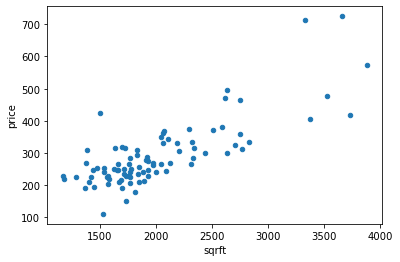

In [5]:
hp_data.plot.scatter("sqrft","price")

***
## Simple Linear Regression Model

#### Model Estimation by the Ordinary Least Square (OLS) method

Estimate the model $$price = \beta_0 + \beta_1 sqrft + u,$$
where price is the house price measured in thousands of dollars.

In [6]:
model = smf.ols(formula = 'price ~ sqrft', data = hp_data).fit()

#### Get the estimation results

In [7]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     140.8
Date:                Wed, 22 Sep 2021   Prob (F-statistic):           8.42e-20
Time:                        20:21:16   Log-Likelihood:                -489.31
No. Observations:                  88   AIC:                             982.6
Df Residuals:                      86   BIC:                             987.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2041     24.743      0.453      0.652     -37.983      60.391
sqrft          0.1402      0.012     11.866      0.000       0.117       0.164
==============================================================================
Omnibus:                       26.343   Durbin-Watson:                   1.729
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.311
Skew:                           1.185   Prob(JB):                     8.79e-11
Kurtosis:                       5.649   Cond. No.                     7.64e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### How would you interpret the results?

1. Write out the results in equation form.

price = 11.2041 + 0.1402 sqrft

2. What is the estimated increase in price for a house with an additional 140 square feet in size?

In [8]:
0.1402*140

19.628

3. What percentage of the variation in price is explained by square footage?

62.1%

4. The first house in the sample has $sqrft = 2,438$. Find the predicted selling price for this house from the OLS regression line.

In [9]:
11.2041 + 0.1402*2438

353.01169999999996

5. The actual selling price of the first house in the sample was \\$300,000 ($price$ = 300). Find the residual for this house. Does it suggest that the buyer underpaid or overpaid for the house?

In [10]:
300 - 353.0117

-53.01170000000002

***

## References

- Jeffrey M. Wooldridge (2019) "Introductory Econometrics: A Modern Approach, 7e" Chapter 2.

- The pandas development team (2020). "[pandas-dev/pandas: Pandas](https://pandas.pydata.org/)." Zenodo.
    
- Seabold, Skipper, and Josef Perktold (2010). "[statsmodels: Econometric and statistical modeling with python](https://www.statsmodels.org/stable/examples/notebooks/generated/ols.html)." Proceedings of the 9th Python in Science Conference.